In [17]:
!echo repos/*-logfile.log | xargs cat > logfile.log
!awk '(NR == 1) || (FNR > 1)' repos/*-abs-churn.csv > abs-churn.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-age.csv > age.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-author-churn.csv > author-churn.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-authors.csv > authors.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-communication.csv > communication.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-coupling.csv > coupling.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-entity-churn.csv > entity-churn.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-entity-effort.csv > entity-effort.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-entity-ownership.csv > entity-ownership.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-fragmentation.csv > fragmentation.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-identity.csv > identity.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-main-dev.csv > main-dev.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-main-dev-by-revs.csv > main-dev-by-revs.csv
#!awk '(NR == 1) || (FNR > 1)' repos/*-messages.csv > messages.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-refactoring-main-dev.csv > refactoring-main-dev.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-revisions.csv > revisions.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-soc.csv > soc.csv
!awk '(NR == 1) || (FNR > 1)' repos/*-summary.csv > summary.csv

In [18]:
import pandas as pd
import re

def parse_git_log(file_path):
    commit_pattern = re.compile(r'^\[([a-f0-9]+)\] (.+) (\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2} [+-]\d{4}) (.+)$')
    file_pattern = re.compile(r'^(\d+)\s+(\d+)\s+(.+)$')

    commits = []
    files = []

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    current_commit = None

    for line in lines:
        commit_match = commit_pattern.match(line.strip())
        if commit_match:
            commit_id, author, date, message = commit_match.groups()
            current_commit = {
                'commit_id': commit_id,
                'author': author,
                'date': date,
                'message': message
            }
            commits.append(current_commit)
        else:
            file_match = file_pattern.match(line.strip())
            if file_match and current_commit:
                added, deleted, filepath = file_match.groups()
                files.append({
                    'commit_id': current_commit['commit_id'],
                    'added': int(added),
                    'deleted': int(deleted),
                    'filepath': filepath
                })

    return commits, files

# Analisando o log
commits, files = parse_git_log("logfile.log")

# Criando os DataFrames
commits_df = pd.DataFrame(commits)
files_df = pd.DataFrame(files)

In [ ]:
commits_df

In [20]:
files_df

,commit_id,added,deleted,filepath
0,75223d48,7,0,CHANGELOG.md
1,75223d48,1,1,package.json
2,3144340c,13,0,src/common/utils/sort.ts
3,3144340c,2,5,src/containers/DrawerFilter/components/ReasonF...
4,3144340c,27,22,src/pages/UserControl/InputGroups.tsx
...,...,...,...,...
42139,447356fa,5,0,src/services/health.ts
42140,447356fa,5,0,src/setupTests.ts
42141,447356fa,8,0,src/styles.d.ts
42142,447356fa,27,0,tsconfig.json


In [ ]:
import pandas as pd
import re

def classify_change(message):
    if re.search(r'\bfeat\b|\bfeat:\b|\bfeat\(', message, re.IGNORECASE):
        return 'feature'
    elif re.search(r'chore\(release\):', message, re.IGNORECASE):
        return 'release'
    elif re.search(r'\bfix\b|\bfix:\b|\bfix\(', message, re.IGNORECASE):
        return 'fix'
    elif re.search(r'\bchore\b|\bchore:\b|\bchore\(', message, re.IGNORECASE):
        return 'chore'
    elif re.search(r'\bmerge\b|\bmerge:\b|\bmerge\(', message, re.IGNORECASE):
        return 'merge'
    else:
        return 'other'

def extract_release_number(message):
    match = re.search(r'chore\(release\):\s*(\d+\.\d+\.\d+)', message, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None

def classify_release(release_number):
    if release_number:
        version, major, minor = map(int, release_number.split('.'))
        if minor == 0:
            return 'major'
        else:
            return 'minor'
    return None

# Adicionando as novas colunas ao commits_df
commits_df['change_type'] = commits_df['message'].apply(classify_change)
commits_df['release_number'] = commits_df['message'].apply(extract_release_number)
commits_df['release_class'] = commits_df['release_number'].apply(classify_release)

commits_df


In [22]:
import pandas as pd
import re

def classify_change(message):
    if re.search(r'\bfeat\b|\bfeat:\b|\bfeat\(', message, re.IGNORECASE):
        return 'feature'
    elif re.search(r'chore\(release\):', message, re.IGNORECASE):
        return 'release'
    elif re.search(r'\bfix\b|\bfix:\b|\bfix\(', message, re.IGNORECASE):
        return 'fix'
    elif re.search(r'\bchore\b|\bchore:\b|\bchore\(', message, re.IGNORECASE):
        return 'chore'
    elif re.search(r'\bmerge\b|\bmerge:\b|\bmerge\(', message, re.IGNORECASE):
        return 'merge'
    else:
        return 'other'

def extract_release_number(message):
    match = re.search(r'chore\(release\):\s*(\d+\.\d+\.\d+)', message, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None

def classify_release(release_number):
    if release_number:
        major, minor, _ = map(int, release_number.split('.'))
        if major > 0:
            return 'major'
        else:
            return 'minor'
    return None


# Adicionando as novas colunas ao commits_df
commits_df['change_type'] = commits_df['message'].apply(classify_change)
commits_df['release_number'] = commits_df['message'].apply(extract_release_number)
commits_df['release_class'] = commits_df['release_number'].apply(classify_release)

# Convertendo a coluna de data para datetime
commits_df['date'] = pd.to_datetime(commits_df['date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

# Ordenando os commits por data
commits_df = commits_df.sort_values(by='date')

# Criando um dicionário de commit_id para release_number
commit_to_release = {}
current_release = None

for _, row in commits_df.iterrows():
    if row['release_number']:
        current_release = row['release_number']
    commit_to_release[row['commit_id']] = current_release

# Adicionando a coluna release_number ao files_df
files_df['release_number'] = files_df['commit_id'].map(commit_to_release)
files_df['filename'] = files_df['filepath']

files_df

,commit_id,added,deleted,filepath,release_number,filename
0,75223d48,7,0,CHANGELOG.md,0.109.0,CHANGELOG.md
1,75223d48,1,1,package.json,0.109.0,package.json
2,3144340c,13,0,src/common/utils/sort.ts,1.124.0,src/common/utils/sort.ts
3,3144340c,2,5,src/containers/DrawerFilter/components/ReasonF...,1.124.0,src/containers/DrawerFilter/components/ReasonF...
4,3144340c,27,22,src/pages/UserControl/InputGroups.tsx,1.124.0,src/pages/UserControl/InputGroups.tsx
...,...,...,...,...,...,...
42139,447356fa,5,0,src/services/health.ts,0.130.1,src/services/health.ts
42140,447356fa,5,0,src/setupTests.ts,0.130.1,src/setupTests.ts
42141,447356fa,8,0,src/styles.d.ts,0.130.1,src/styles.d.ts
42142,447356fa,27,0,tsconfig.json,0.130.1,tsconfig.json


In [23]:
import duckdb

# Pegar todas as changes que tiveram fix

df_reliability = duckdb.query("""
    with files as (
        SELECT f.commit_id, f.filepath, c.message, c.date, c.change_type,
            row_number() OVER (PARTITION BY f.filepath, c.change_type ORDER BY c.date) as row_num,
            row_number() OVER (PARTITION BY f.filepath ORDER BY c.date) as row_num_filepath
        FROM files_df f
        JOIN commits_df c on c.commit_id = f.commit_id
    )
    select *,
        CASE WHEN TBF <= 7 THEN 1 WHEN TBF <= 28 THEN 4 WHEN TBF <= 84 THEN 12 ELSE 24 END AS TBF_CLASS,
        CASE WHEN TBI <= 7 THEN 1 WHEN TBI <= 28 THEN 4 WHEN TBI <= 84 THEN 12 ELSE 24 END AS TBI_CLASS,
        CASE WHEN TBF <= 7 THEN '1w' WHEN TBF <= 28 THEN '1m' WHEN TBF <= 12 THEN '3m' ELSE '+6m' END AS TBF_CLASS_NAME,
        CASE WHEN TBI <= 7 THEN '1w' WHEN TBI <= 28 THEN '1m' WHEN TBI <= 12 THEN '3m' ELSE '+6m' END AS TBI_CLASS_NAME,
        CASE WHEN TBF <= 7 THEN '1w' ELSE '+' END AS TBF_CLASS_NAME_1W,
        CASE WHEN TBI <= 7 THEN '1w' ELSE '+' END AS TBI_CLASS_NAME_1W,
        CASE WHEN TBF <= 28 THEN '1m' ELSE '+' END AS TBF_CLASS_NAME_1M,
        CASE WHEN TBI <= 28 THEN '1m' ELSE '+' END AS TBI_CLASS_NAME_1M
    from ( 
        select f.commit_id, f.filepath, f.message, lf.last_feature_commit_id, lf.last_feature_message, lc.last_commit_id, lc.last_commit_message,
        --, f.change_type 
        date_diff('days', f.date, lf.last_feature_date) as TBI, date_diff('days', f.date, lc.last_commit_date) TBF,
        from files f 
        left join ( select commit_id as last_feature_commit_id, message as last_feature_message, 
                    date as last_feature_date, filepath as last_feature_filepath 
                    from files 
                where change_type = 'feature' and row_num = 1 ) lf 
            on f.filepath = lf.last_feature_filepath and lf.last_feature_date >= f.date
        left join ( select commit_id as last_commit_id, message as last_commit_message, 
                    date as last_commit_date, filepath as last_commit_filepath 
                    from files 
                where row_num_filepath = f.row_num_filepath+1 ) lc
            on f.filepath = lc.last_commit_filepath and lc.last_commit_date >= f.date
        where lc.last_commit_id is not null 
            and lc.last_commit_id != last_feature_commit_id
            and f.change_type not in ( 'feature', 'release' )
        order by f.date desc
    )

""").to_df()
df_reliability

,commit_id,filepath,message,last_feature_commit_id,last_feature_message,last_commit_id,last_commit_message,TBI,TBF,TBF_CLASS,TBI_CLASS,TBF_CLASS_NAME,TBI_CLASS_NAME,TBF_CLASS_NAME_1W,TBI_CLASS_NAME_1W,TBF_CLASS_NAME_1M,TBI_CLASS_NAME_1M
0,118c6cac,app/common/mapping/fields.py,fix: partner store errors,299ea94c,feat: universe minimal lead,e67a9230,fix: contact list min name length error,115,1,1,24,1w,+6m,1w,+,1m,+
1,65f4d295,src/containers/BulkAction/components/BulkActio...,fix(project): fix: max length bulk action form,9545c96f,feat(project): migracao maas-components v4,f43e9bc8,fix(project): fix: max length bulk action form,18,0,1,4,1w,1m,1w,+,1m,1m
2,5756f760,migrations/202305240857_get_risk_analysis_adju...,chore: treating invalid cpf,e29dc736,feat: utilizar a nova versao do ps-security cm01,58ac31f2,chore: ajustes code review,56,0,1,12,1w,+6m,1w,+,1m,+
3,167d2fff,migrations/202309140917_create_lead_mma.py,chore: change financial email,e29dc736,feat: utilizar a nova versao do ps-security cm01,7f88d565,chore: send empty string account name,62,47,12,12,+6m,+6m,+,+,+,+
4,5b131268,src/containers/ReportTableDisplay/ReportTableC...,Feature/remover aprovado por e agrupar canais,5fdd0de2,feat(project): feat: remove resultado da regra...,530bde49,fix(blocklist-new): removendo flag de acao manual,53,14,4,12,1m,+6m,+,+,1m,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,55f47b30,requirements/base.txt,Initial commit,1d6bf8af,feat: add google re2,8190c6d2,Add blocklist rules CRUD APIs,298,10,4,24,1m,+6m,+,+,1m,+
2369,55f47b30,.gitignore,Initial commit,444ca5b2,feat(blocklist): traduzindo,08fc5581,Ci/Cd.,208,26,4,24,1m,+6m,+,+,1m,+
2370,55f47b30,run.py,Initial commit,7b9098b4,feat: add workflow routes,8190c6d2,Add blocklist rules CRUD APIs,562,10,4,24,1m,+6m,+,+,1m,+
2371,55f47b30,conftest.py,Initial commit,f22c579a,feat: add revalidate task,8190c6d2,Add blocklist rules CRUD APIs,285,10,4,24,1m,+6m,+,+,1m,+


In [24]:
duckdb.query("""
    with files as (
        SELECT f.commit_id, f.filepath, c.message, c.date, c.change_type,
            row_number() OVER (PARTITION BY f.filepath, c.change_type ORDER BY c.date) as row_num,
            row_number() OVER (PARTITION BY f.filepath ORDER BY c.date) as row_num_filepath
        FROM files_df f
        JOIN commits_df c on c.commit_id = f.commit_id
    )
    select *,
    from files f 
        left join ( select commit_id as last_commit_id, message as last_commit_message, 
                    date as last_commit_date, filepath as last_commit_filepath 
                    from files 
                where row_num_filepath = f.row_num_filepath+1 ) lc
        on f.filepath = lc.last_commit_filepath and lc.last_commit_date >= f.date
        where f.change_type not in ( 'feature', 'release' )
""").to_df()

,commit_id,filepath,message,date,change_type,row_num,row_num_filepath,last_commit_id,last_commit_message,last_commit_date,last_commit_filepath
0,f38b9e5a,.devcontainer/Dockerfile.workspace,chore: add devcontainer,2023-09-04 17:30:29-03:00,chore,1,1,504078e2,feat: archive workflow,2024-02-01 06:59:09-03:00,.devcontainer/Dockerfile.workspace
1,f38b9e5a,.devcontainer/devcontainer.json,chore: add devcontainer,2023-09-04 17:30:29-03:00,chore,1,2,ae15d413,feat(dev container): add,2023-10-09 11:58:52-03:00,.devcontainer/devcontainer.json
2,268cae64,.dockerignore,ci: deploy e rollback no argocd em stg e prod,2021-09-15 19:16:10-03:00,other,1,1,28c61c8c,feat: heathcheck,2022-10-27 14:12:25-03:00,.dockerignore
3,ffd4710c,.test.env,chore: keycloak variables adjustment,2022-01-24 08:51:22-03:00,chore,1,2,9bf2d364,"refactor: camadas, adicionado cdi e kk",2022-02-10 12:41:45-03:00,.test.env
4,9695d306,app/api/exception_handler.py,docs(api docs): use new examples keyword,2023-10-09 14:11:34-03:00,other,1,1,118c6cac,fix: partner store errors,2024-02-26 21:12:50-03:00,app/api/exception_handler.py
...,...,...,...,...,...,...,...,...,...,...,...
16146,af846c9a,devtools/fintech/default.conf.template,ci: add auto pipeline,2024-05-28 10:21:12-03:00,other,1,3,None,None,NaT,None
16147,b3162e9e,src/components/FastDialog/__tests__/FastDialog...,[UST-CE0B] Ajustar mensagens na tela de config...,2023-12-15 17:06:44-03:00,other,1,1,None,None,NaT,None
16148,4e1b9fef,src/containers/Generic/components/VirtualizedT...,fix(bug-4897): ajuste filtro buscar por,2024-04-09 09:48:52-03:00,fix,1,7,None,None,NaT,None
16149,56a3f131,src/domain/Lead/utils/methods.ts,fix(hotfix): ajuste type workflows,2024-01-15 17:18:36-03:00,fix,2,16,None,None,NaT,None


<AxesSubplot:>

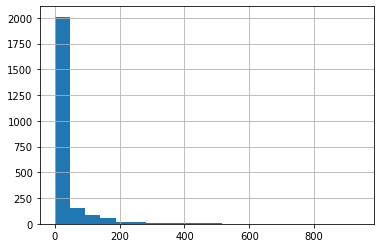

In [25]:
df_reliability['TBFn'] = df_reliability['TBF'].values.astype("int")
df_reliability['TBFn'].hist(bins=20)

# .hist(bins=20))

<AxesSubplot:>

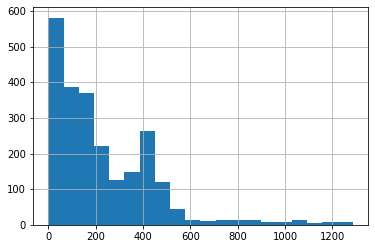

In [26]:
df_reliability['TBIn'] = df_reliability['TBI'].values.astype("int")
df_reliability['TBIn'].hist(bins=20)

In [ ]:
# df_estudo_fatores = duckdb.query("""
    select /*af.size,*/ af.filename, /*af.path,*/ mr.TBI, mr.TBF, 
        mr.TBI_CLASS, mr.TBF_CLASS, mr.TBI_CLASS_NAME, mr.TBF_CLASS_NAME, 
        mr.TBI_CLASS_NAME_1W, mr.TBF_CLASS_NAME_1W, mr.TBI_CLASS_NAME_1M, mr.TBF_CLASS_NAME_1M, 
        ag."age-months", cp."coupling-degree", cp."coupling-average-revs",
        ef."entity-effort-total-revs", ec.added, ec.deleted, ec.commits, soc.soc,
        md."main-dev", md.added, md."total-added", md.ownership, 
        mc."author-shared", mc."author-average", mc."author-strength", 
        fg."fractal-value", fg."total-revs"
    from files_df af 
    left join df_reliability mr on af.filename = mr.filepath
    left join age.csv ag on af.filename = ag.entity
    left join (select entity,avg(degree) as "coupling-degree" ,avg("average-revs") as "coupling-average-revs" 
                from coupling.csv group by entity) cp on af.filename = cp.entity
    left join (select entity,avg("total-revs") as "entity-effort-total-revs"
                from 'entity-effort.csv' group by entity) ef on af.filename = ef.entity 
    left join "entity-churn.csv" ec on af.filename = ec.entity
    left join soc.csv soc on af.filename = soc.entity
    left join "main-dev.csv" md on af.filename = md.entity
    left join (select author, avg(shared) as "author-shared", avg(average) as "author-average", avg(strength) as "author-strength" 
                from 'communication.csv' group by author) mc on mc.author = md."main-dev"
    left join fragmentation.csv fg on af.filename = fg.entity
    
""").to_df()
df_estudo_fatores.to_csv('estudo_fatores.csv')
df_estudo_fatores

In [28]:
df_estudo_fatores1 = duckdb.query("""
    select /*af.size,*/ af.filename, /*af.path,*/ mr.TBI, mr.TBF, 
        mr.TBI_CLASS, mr.TBF_CLASS, mr.TBI_CLASS_NAME, mr.TBF_CLASS_NAME, 
        mr.TBI_CLASS_NAME_1W, mr.TBF_CLASS_NAME_1W, mr.TBI_CLASS_NAME_1M, mr.TBF_CLASS_NAME_1M, 
        ag."age-months", cp."coupling-degree", cp."coupling-average-revs",
        ef."entity-effort-total-revs", ec.added, ec.deleted, ec.commits, soc.soc,
        md."main-dev", md.added, md."total-added", md.ownership, 
        mc."author-shared", mc."author-average", mc."author-strength", 
        fg."fractal-value", fg."total-revs"
    from files_df af 
    left join df_reliability mr on af.filename = mr.filepath
    left join age.csv ag on af.filename = ag.entity
    left join (select entity,avg(degree) as "coupling-degree" ,avg("average-revs") as "coupling-average-revs" 
                from coupling.csv group by entity) cp on af.filename = cp.entity
    left join (select entity,avg("total-revs") as "entity-effort-total-revs"
                from 'entity-effort.csv' group by entity) ef on af.filename = ef.entity 
    left join "entity-churn.csv" ec on af.filename = ec.entity
    left join (
        select entity, max(soc) as soc from soc.csv soc
        left join df_reliability mr on mr.filepath = soc.entity
        where mr.TBF is not null group by entity
    ) soc on af.filename = soc.entity
    left join (
        select entity, max("main-dev") as "main-dev", max("added") as "added",
        max("total-added") as "total-added",max("ownership") as "ownership" 
        from "main-dev.csv" md
        left join df_reliability mr on mr.filepath = md.entity
        where mr.TBF is not null group by entity
    ) md on af.filename = md.entity
    left join (
        select entity, max("fractal-value") as "fractal-value", max("total-revs") as "total-revs"
        from fragmentation.csv fg
        left join df_reliability mr on mr.filepath = fg.entity
        where mr.TBF is not null group by entity
    ) fg on af.filename = fg.entity
    left join (select author, avg(shared) as "author-shared", avg(average) as "author-average", avg(strength) as "author-strength" 
                from 'communication.csv' group by author) mc on mc.author = md."main-dev"
    where mr.TBF is not null
""").to_df()
df_estudo_fatores1.to_csv('estudo_fatores1.csv')


In [29]:
import pandas as pd

# Carregar o DataFrame a partir de um arquivo CSV
df = df_estudo_fatores1

# Calcular o primeiro Score de Confiabilidade
df['Score_People'] = (
    0.961 * df['author-shared'] +
    0.981 * df['author-average'] -
    0.473 * df['author-strength'] +
    0.845 * df['soc'] +
    0.945 * df['total-added'] -
    0.911 * df['ownership']
)

# Calcular o segundo Score de Confiabilidade
df['Score_Code'] = (
    0.760 * df['coupling-degree'] +
    0.975 * df['coupling-average-revs'] +
    0.928 * df['entity-effort-total-revs'] +
    0.792 * df['added'] +
    0.923 * df['deleted'] +
    0.852 * df['commits'] -
    0.939 * df['fractal-value'] +
    0.982 * df['total-revs'] -
    0.329 * df['age-months']
)

# Exibir as primeiras linhas do DataFrame com os novos scores
print(df.head())

# Salvar o DataFrame resultante em um novo arquivo CSV
df.to_csv('estudo_fatores2.csv')

                                filename   TBI  TBF  TBI_CLASS  TBF_CLASS  \
0                  contrib/migrations.py  1261   35         24         12   
1            tests/api/test_user_rest.py     8    6          4          1   
2                   devtools/dotenv.test     1    0          1          1   
3      blocklist/businesses/validator.py    19    0          4          1   
4  devtools/sonar-project.prd.properties    41   41         12         12   

  TBI_CLASS_NAME TBF_CLASS_NAME TBI_CLASS_NAME_1W TBF_CLASS_NAME_1W  \
0            +6m            +6m                 +                 +   
1             1m             1w                 +                1w   
2             1w             1w                1w                1w   
3             1m             1w                 +                1w   
4            +6m            +6m                 +                 +   

  TBI_CLASS_NAME_1M  ... added_1  total-added  ownership  author-shared  \
0                 +  ...     140   

In [43]:
df_all_files = pd.read_csv('all_files2.csv')

In [46]:
df_all_files

,size,filename,path
0,0,.buildpacks,NaN
1,7,.coveragerc,NaN
2,14,.devcontainer/Dockerfile.workspace,.devcontainer
3,30,.devcontainer/devcontainer.json,.devcontainer
4,24,.devcontainer/docker-compose.workspace.yml,.devcontainer
...,...,...,...
1525,328,tests/lib/dict/anonymize,tests/lib/dict
1526,237,tests/lib/dict/diff,tests/lib/dict
1527,466,tests/utils,tests
1528,226,tests/utils/builders,tests/utils


In [ ]:
df_scores_file = duckdb.query("""
    select *
    from df_all_files
    left join "ps-onboarding-api-main-dev.csv" md on md.entity = df_all_files.filename
    order by md.entity desc
""").to_df()
df_scores_file

In [55]:
import plotly.express as px
import pandas as pd
import numpy as np
df_all_files = pd.read_csv('all_files2.csv')
fig = px.treemap(
    names = df_all_files['filename'],
    parents = df_all_files['path'],
    color=df_scores_file['ownership'],
    hover_data=[df_all_files['filename'],df_scores_file['main-dev']],
    color_continuous_scale='RdBu',
    #color_continuous_midpoint=np.average(np.zeros(len(df_all_files)), weights=np.ones(len(df_all_files)))
)
#fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout(
    uniformtext=dict(minsize=10, mode='hide'),
    margin = dict(t=50, l=25, r=25, b=25),
    autosize=False,
    width=1000,
    height=1000
)

fig.write_html("map.html")

#from IPython.core.display import HTML
#HTML(fig.to_html(full_html=True))
fig